<p align="center" style="font-size:400%;"> <b>Erdös Rényi Network Model: Classic algorithm (vs) Monte Carlo Comparison</b>
</p>
<br>
<p align="center">Kamil P. Orzechowski  </p>
<br>
<p align="justify">Erdös Rényi Graphs are well known examples of random networks with binomial degree distribution. Here I show a possibility of simulating the results with Metropolis Algorithm. Note that for small (<i>p</i>) binomial distribution becomes Poisson and then for large (<i>n</i>) Gaussian!</p>
<br>

More about ER Graphs [<i>here</i>](http://www.cs.unibo.it/~babaoglu/courses/csns15-16/slides/10-models-erdos-renyi.pdf). Enjoy! :)

In [45]:
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
import graphviz as pg
!apt install libgraphviz-dev
!pip install pygraphviz
import pygraphviz as pgh
import numpy as np
import random as rd
import itertools as it
from collections import Counter
import seaborn as sns
sns.set(font_scale=1.5)
sns.set_style("whitegrid")

Class **Vertex**

In [33]:
class Vertex:
  def __init__(self, __ID):
    self.__ID = __ID
    self.__sub_adj = []
    self.__state = 0
 
  def Get_ID(self):
    return self.__ID

  def Get_Neighbours(self):
    return self.__sub_adj

  def Get_degree(self):
    return len(self.__sub_adj)

  def Get_state(self):
    return self.__state
  
  def Set_state(self,state):
    self.__state = state

**Class Simple Graph**

In [34]:
class Simple_Graph:
  def __init__(self):
    self.__main_adj = []
    self.__main_edg = []
    self.__N_vert = 0
    self.__N_edge = 0

  def add_Vertex(self, return_v = False): 
    Vert_N = Vertex(self.__N_vert)
    self.Get_Vertices().append(Vert_N)
    self.__N_vert += 1
    if return_v == True:
      return Vert_N

  def IsNeighbour(self, ver1, ver2): 
    if ver2.Get_ID() in ver1.Get_Neighbours() and ver1.Get_ID() in ver2.Get_Neighbours(): 
      return True 
    else:
      return False

  def add_Edge(self, ver1, ver2):
    if ver1 in self.Get_Vertices() and ver2 in self.Get_Vertices():
      ver1.Get_Neighbours().append(ver2.Get_ID())
      ver2.Get_Neighbours().append(ver1.Get_ID())
      self.__N_edge += 1
  
  def Get_Vertex(self,ver_id): 
    iterr = self.Get_Vertices()
    return next(filter(lambda x: x.Get_ID() == ver_id,  iterr))

  def Get_Vertices(self):
    return self.__main_adj
  
  def Get_Edges(self):
    return self.__main_edg

  def Decr_Numb_edg(self):
    self.__N_edge -= 1
          
  def Numb_of_Vert(self):
    return self.__N_vert

  def Numb_of_Edg(self):
    return self.__N_edge

  def G_Vert_dist(self):
    self.G_v_dist = []
    for v in self.Get_Vertices():
      self.G_v_dist.append(v.Get_degree())
    return self.G_v_dist
  
  def Graph_dist(self,ax,dane,tribe,bins,p,coll,scale,title):
    plt.rcParams.update({'font.size': 20})
    N_x, edges = np.histogram(dane, bins = bins, density=False)
    bins2 = edges
    delta_x = [bins2[i]-bins2[i-1] for i in range(1,len(bins2))]
    N = len(dane)
    cent = [(bins2[i]+bins2[i-1])/2 for i in range(1,len(bins2))]
    P_x = [N_x[i]/(N*delta_x[i]) for i in range(len(N_x))]
    ax.set_xlabel(f"{tribe}")
    ax.set_ylabel(f"P({tribe})")
    ax.set_title(f"Nodes degree distribution - {title} Network")
    ax.axvline(x=self.Avg_Deg(), color = coll ,linestyle='dashed', label = f"<k> = {round(self.Avg_Deg(),1)} | p = {p}")
    if scale == "log":
      _ = ax.loglog(cent,P_x,marker = "s")
    elif scale == "lin":
      _ = ax.scatter(cent,P_x,marker = "s")
    ax.legend(loc='upper center')

  def Avg_Deg(self):
    sum = 0
    for x in self.Get_Vertices():
      sum += x.Get_degree()
    avg = sum/(self.Numb_of_Vert())
    return avg

In [35]:
from tqdm import tqdm

**Erdos Renyi Model (ER) | Classic algorithm**

In [36]:
class Erdos_Renyi(Simple_Graph):
  def __init__(self,n_nodes,prob):
    super().__init__()
    for i in range(n_nodes):
      y = self.add_Vertex(True)
      y.Set_state("S")
    for i in it.combinations(self.Get_Vertices(),2):
      if rd.uniform(0,1) < prob:
        self.add_Edge(i[0],i[1])
        self.Get_Edges().append([i[0],i[1]])

In [37]:
ER = Erdos_Renyi(500,0.1)
ER2 = Erdos_Renyi(500,0.7)

In [38]:
for net in [ER,ER2]:
  print(r"------Erdös Rényi Model------")
  print(f"p = {round(net.Avg_Deg()/net.Numb_of_Vert(),2)}")
  print("Number of Vertices: ",net.Numb_of_Vert())
  print("Number of Edges: ",net.Numb_of_Edg())
  print(f"<k> = {net.Avg_Deg()}")

------Erdös Rényi Model------
p = 0.1
Number of Vertices:  500
Number of Edges:  12501
<k> = 50.004
------Erdös Rényi Model------
p = 0.7
Number of Vertices:  500
Number of Edges:  87312
<k> = 349.248


**Erdos Renyi Model (ER) | Monte Carlo**

In [39]:
from scipy.special import comb
class MonteCarlo_ER(Simple_Graph):
  def __init__(self,n_nodes,prob,t):
    super().__init__()
    theta = np.log(prob/(1-prob))
    for i in range(n_nodes):
      self.add_Vertex()
    poss = list(it.combinations(self.Get_Vertices(),2))
    self.edges = []
    for j in range(int(comb(t,2))):
      idx = rd.choice(poss)
      if self.IsNeighbour(idx[0],idx[1]):
        if rd.uniform(0,1) < np.exp(-theta): 
          idx[0].Get_Neighbours().remove(idx[1].Get_ID())
          idx[1].Get_Neighbours().remove(idx[0].Get_ID())
          self.Decr_Numb_edg()
      else:
        if rd.uniform(0,1) < np.exp(theta):
          self.add_Edge(idx[0],idx[1])
      self.edges.append(self.Numb_of_Edg())
  
  def Get_time_edg(self):
    return self.edges

In [40]:
MTER = MonteCarlo_ER(500,0.1,1000)
MTER2 = MonteCarlo_ER(500,0.7,1000)

In [41]:
for net in [MTER,MTER2]:
  print(r"------Monte Carlo Erdös Rényi Model------")
  print(f"p = {round(net.Avg_Deg()/net.Numb_of_Vert(),2)}")
  print("Number of Vertices: ",net.Numb_of_Vert())
  print("Number of Edges: ",net.Numb_of_Edg())
  print(f"<k> = {net.Avg_Deg()}")

------Monte Carlo Erdös Rényi Model------
p = 0.1
Number of Vertices:  500
Number of Edges:  12103
<k> = 48.412
------Monte Carlo Erdös Rényi Model------
p = 0.69
Number of Vertices:  500
Number of Edges:  86844
<k> = 347.376


**Comparison**

Text(0.5, 1.0, 'Number of Edges in time function - Monte Carlo ER Network')

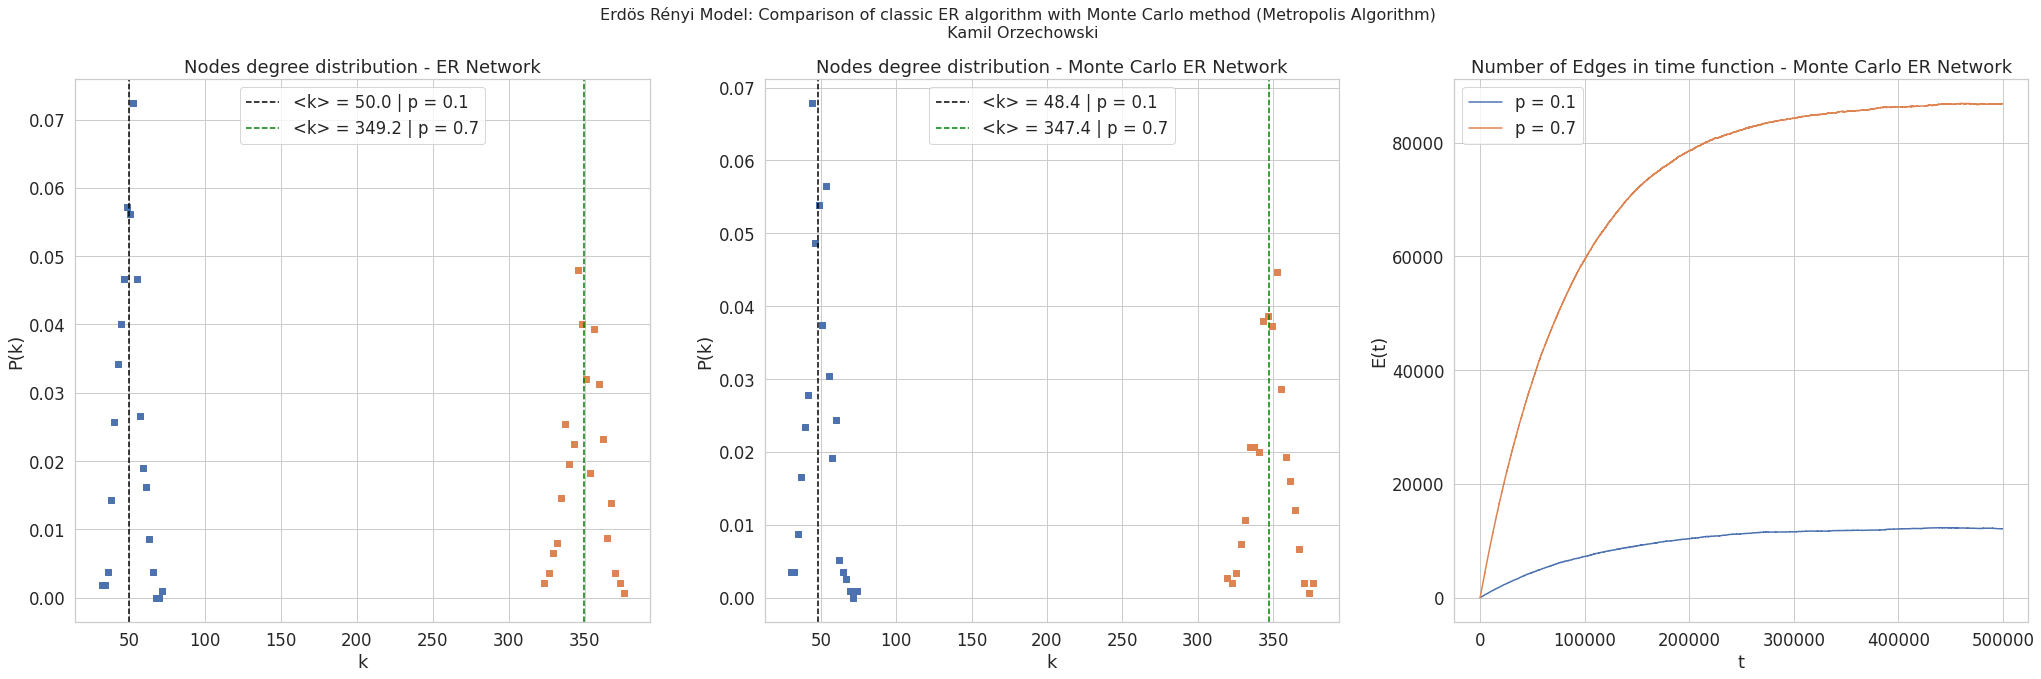

In [46]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize = (35,10))
fig.suptitle("Erdös Rényi Model: Comparison of classic ER algorithm with Monte Carlo method (Metropolis Algorithm) \n Kamil Orzechowski", fontsize = 16)
ER.Graph_dist(ax1,ER.G_Vert_dist(),"k",20,0.1,"black","lin","ER")
ER2.Graph_dist(ax1,ER2.G_Vert_dist(),"k",20,0.7,"green","lin","ER")
MTER.Graph_dist(ax2,MTER.G_Vert_dist(),"k",20,0.1,"black","lin","Monte Carlo ER")
MTER2.Graph_dist(ax2,MTER2.G_Vert_dist(),"k",20,0.7,"green","lin","Monte Carlo ER")
ax3.plot([x for x in range(len(MTER.Get_time_edg()))],MTER.Get_time_edg(),label="p = 0.1")
ax3.plot([x for x in range(len(MTER2.Get_time_edg()))],MTER2.Get_time_edg(),label = "p = 0.7")
ax3.legend()
ax3.set_xlabel("t")
ax3.set_ylabel("E(t)")
ax3.set_title("Number of Edges in time function - Monte Carlo ER Network")